In [1]:
import os
from deepface import DeepFace
import glob
from tqdm import tqdm

import numpy as np
import pandas as pd

In [2]:
def authenticate_user(image_path):
    result = DeepFace.find(image_path, db_path="../data/dataset_v2/all_images", silent=True)
    return result

In [3]:
images = glob.glob("../data/luminance/**/*.jpg", recursive=True)


def get_profile_data_dict(image_path: str):
    normalized = os.path.normpath(image_path)
    path_parts = normalized.split(os.sep)

    method = path_parts[-3]

    amount = (
        float(path_parts[-2].replace("_", ".")).__round__(2)
        if method != "quadratic"
        else np.nan
    )

    return {
        "name": path_parts[-4],
        "method": path_parts[-3],
        "amount": amount,
        "sample_number": int(path_parts[-1].replace(".jpg", "")),
        "path": image_path,
    }


profile_data_structured = list(map(get_profile_data_dict, images))
profile_data_structured[0:3]

[{'name': 'Seth_Rogenprofile',
  'method': 'quadratic',
  'amount': nan,
  'sample_number': 4,
  'path': '../data/luminance/profiles/Seth_Rogenprofile/quadratic/quadratic/4.jpg'},
 {'name': 'Seth_Rogenprofile',
  'method': 'quadratic',
  'amount': nan,
  'sample_number': 2,
  'path': '../data/luminance/profiles/Seth_Rogenprofile/quadratic/quadratic/2.jpg'},
 {'name': 'Seth_Rogenprofile',
  'method': 'quadratic',
  'amount': nan,
  'sample_number': 3,
  'path': '../data/luminance/profiles/Seth_Rogenprofile/quadratic/quadratic/3.jpg'}]

In [8]:
def try_authentication(profile_data_structured):
    try:
        result = authenticate_user(profile_data_structured["path"])
        distance = result[0]["distance"][0]
        person = " ".join((result[0]["identity"][0]).split("\\")[-1].split("_")[:-2])
        max_distance = 0.35
        return distance <= max_distance, distance, person
    except:
        return pd.NA, pd.NA, pd.NA


if not os.path.exists("results.csv"):
    for prof in tqdm(profile_data_structured):
        prof["authenticated"], prof["distance"], prof["detected_person"] = (
            try_authentication(prof)
        )

    df = pd.DataFrame(profile_data_structured)
    df.to_csv("results.csv", index=False)

else:
    df = pd.read_csv("results.csv")

100%|██████████| 3900/3900 [24:58<00:00,  2.60it/s]


In [10]:
df

,name,method,amount,sample_number,path,authenticated,distance,detected_person
0,Seth_Rogenprofile,quadratic,NaN,4,../data/luminance/profiles/Seth_Rogenprofile/q...,True,0.107012,../data/dataset v2/all images/Seth Rogen
1,Seth_Rogenprofile,quadratic,NaN,2,../data/luminance/profiles/Seth_Rogenprofile/q...,True,0.090695,../data/dataset v2/all images/Seth Rogen
2,Seth_Rogenprofile,quadratic,NaN,3,../data/luminance/profiles/Seth_Rogenprofile/q...,True,0.158103,../data/dataset v2/all images/Seth Rogen
3,Seth_Rogenprofile,quadratic,NaN,1,../data/luminance/profiles/Seth_Rogenprofile/q...,True,0.097613,../data/dataset v2/all images/Seth Rogen
4,Seth_Rogenprofile,quadratic,NaN,0,../data/luminance/profiles/Seth_Rogenprofile/q...,True,0.070946,../data/dataset v2/all images/Seth Rogen
...,...,...,...,...,...,...,...,...
3895,Elijah_Woodprofile,constant,30.0,4,../data/luminance/profiles/Elijah_Woodprofile/...,True,0.029842,../data/dataset v2/all images/Elijah Wood
3896,Elijah_Woodprofile,constant,30.0,2,../data/luminance/profiles/Elijah_Woodprofile/...,True,0.012965,../data/dataset v2/all images/Elijah Wood
3897,Elijah_Woodprofile,constant,30.0,3,../data/luminance/profiles/Elijah_Woodprofile/...,True,0.037636,../data/dataset v2/all images/Elijah Wood
3898,Elijah_Woodprofile,constant,30.0,1,../data/luminance/profiles/Elijah_Woodprofile/...,True,0.012081,../data/dataset v2/all images/Elijah Wood


In [14]:
df.name = df.name.str.replace("profile", "").str.replace("_", " ")
df.detected_person = df.detected_person.str.replace("../data/dataset v2/all images/", "")
df["detected_same_person"] = df["name"] == df["detected_person"]
df.amount = df[["amount"]].fillna(0)
df

,name,method,amount,sample_number,path,authenticated,distance,detected_person,detected_same_person
0,Seth Rogen,quadratic,0.0,4,../data/luminance/profiles/Seth_Rogenprofile/q...,True,0.107012,Seth Rogen,True
1,Seth Rogen,quadratic,0.0,2,../data/luminance/profiles/Seth_Rogenprofile/q...,True,0.090695,Seth Rogen,True
2,Seth Rogen,quadratic,0.0,3,../data/luminance/profiles/Seth_Rogenprofile/q...,True,0.158103,Seth Rogen,True
3,Seth Rogen,quadratic,0.0,1,../data/luminance/profiles/Seth_Rogenprofile/q...,True,0.097613,Seth Rogen,True
4,Seth Rogen,quadratic,0.0,0,../data/luminance/profiles/Seth_Rogenprofile/q...,True,0.070946,Seth Rogen,True
...,...,...,...,...,...,...,...,...,...
3895,Elijah Wood,constant,30.0,4,../data/luminance/profiles/Elijah_Woodprofile/...,True,0.029842,Elijah Wood,True
3896,Elijah Wood,constant,30.0,2,../data/luminance/profiles/Elijah_Woodprofile/...,True,0.012965,Elijah Wood,True
3897,Elijah Wood,constant,30.0,3,../data/luminance/profiles/Elijah_Woodprofile/...,True,0.037636,Elijah Wood,True
3898,Elijah Wood,constant,30.0,1,../data/luminance/profiles/Elijah_Woodprofile/...,True,0.012081,Elijah Wood,True


In [15]:
aggregated = (
    df[["method", "amount", "detected_same_person"]]
    .groupby(["method", "amount"])
    .sum()
    .join(
        df[["method", "amount", "detected_same_person"]]
        .groupby(["method", "amount"])
        .count(),
        rsuffix="_expected_value",
    )
)

aggregated["FNR"] = (
    1
    - aggregated["detected_same_person"]
    / aggregated["detected_same_person_expected_value"]
)
aggregated["TPR"] = (
    aggregated["detected_same_person"]
    / aggregated["detected_same_person_expected_value"]
)

aggregated

detected_same_person  detected_same_person_expected_value  \
method    amount                                                               
constant  -100.00                   365                                  390   
          -20.00                    380                                  390   
          -10.00                    381                                  390   
           30.00                    378                                  390   
linear     0.50                     380                                  390   
           0.60                     377                                  390   
           0.75                     380                                  390   
           1.33                     380                                  390   
           1.50                     380                                  390   
quadratic  0.00                     375                                  390   

                        FNR       TPR  
method    amount                       
constant  -100.00  0.064103  0.935897  
          -20.00   0.025641  0.974359  
          -10.00   0.023077  0.976923  
           30.00   0.030769  0.969231  
linear     0.50    0.025641  0.974359  
           0.60    0.033333  0.966667  
           0.75    0.025641  0.974359  
           1.33    0.025641  0.974359  
           1.50    0.025641  0.974359  
quadratic  0.00    0.038462  0.961538

In [16]:
aggregated.reset_index(inplace=True)

In [18]:
import matplotlib.pyplot as plt

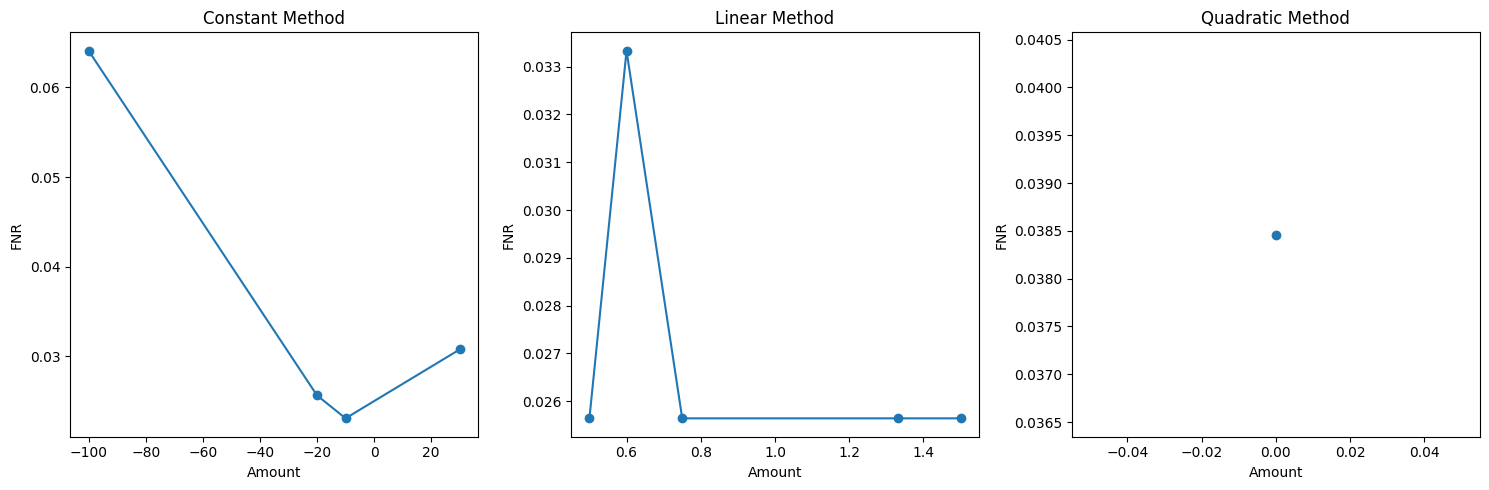

In [19]:
# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
linear_data = aggregated[aggregated["method"] == "linear"][["amount", "FNR"]]
linear_data.reset_index(drop=True, inplace=True)
quadratic_data = aggregated[aggregated["method"] == "quadratic"][["amount", "FNR"]]
quadratic_data.reset_index(drop=True, inplace=True)
constant_data = aggregated[aggregated["method"] == "constant"][["amount", "FNR"]]
constant_data.reset_index(drop=True, inplace=True)

# Plot FNR for constant method
axs[0].plot(constant_data["amount"], constant_data["FNR"], marker="o")
axs[0].set_title("Constant Method")
axs[0].set_xlabel("Amount")
axs[0].set_ylabel("FNR")

# Plot FNR for linear method
axs[1].plot(linear_data["amount"], linear_data["FNR"], marker="o")
axs[1].set_title("Linear Method")
axs[1].set_xlabel("Amount")
axs[1].set_ylabel("FNR")

# Plot FNR for quadratic method
axs[2].plot(quadratic_data["amount"], quadratic_data["FNR"], marker="o")
axs[2].set_title("Quadratic Method")
axs[2].set_xlabel("Amount")
axs[2].set_ylabel("FNR")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [20]:
latex = aggregated.to_latex(index=False)
print(latex)

\begin{tabular}{lrrrrr}
\toprule
method & amount & detected_same_person & detected_same_person_expected_value & FNR & TPR \\
\midrule
constant & -100.000000 & 365 & 390 & 0.064103 & 0.935897 \\
constant & -20.000000 & 380 & 390 & 0.025641 & 0.974359 \\
constant & -10.000000 & 381 & 390 & 0.023077 & 0.976923 \\
constant & 30.000000 & 378 & 390 & 0.030769 & 0.969231 \\
linear & 0.500000 & 380 & 390 & 0.025641 & 0.974359 \\
linear & 0.600000 & 377 & 390 & 0.033333 & 0.966667 \\
linear & 0.750000 & 380 & 390 & 0.025641 & 0.974359 \\
linear & 1.330000 & 380 & 390 & 0.025641 & 0.974359 \\
linear & 1.500000 & 380 & 390 & 0.025641 & 0.974359 \\
quadratic & 0.000000 & 375 & 390 & 0.038462 & 0.961538 \\
\bottomrule
\end{tabular}

